# Creating and Backtesting RSI Strategies

## Getting the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [2]:
data = pd.read_csv("cryptos.csv", parse_dates = ["Date"], index_col = "Date")

In [3]:
data

,BTC,ETH,LTC,DASH
Date,,,,
2016-01-01,434.334015,0.948024,3.508980,3.377020
2016-01-02,433.437988,0.937124,3.502160,3.280160
2016-01-03,430.010986,0.971905,3.483070,3.240140
2016-01-04,433.091003,0.954480,3.495390,3.318990
2016-01-05,431.959991,0.950176,3.469670,3.325760
...,...,...,...,...
2021-02-26,46339.761719,1446.033691,170.398148,206.701660
2021-02-27,46188.453125,1459.973145,172.100449,211.656204
2021-02-28,45137.769531,1416.048950,164.927170,196.271896


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1884 entries, 2016-01-01 to 2021-03-02
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BTC     1884 non-null   float64
 1   ETH     1884 non-null   float64
 2   LTC     1884 non-null   float64
 3   DASH    1884 non-null   float64
dtypes: float64(4)
memory usage: 73.6 KB


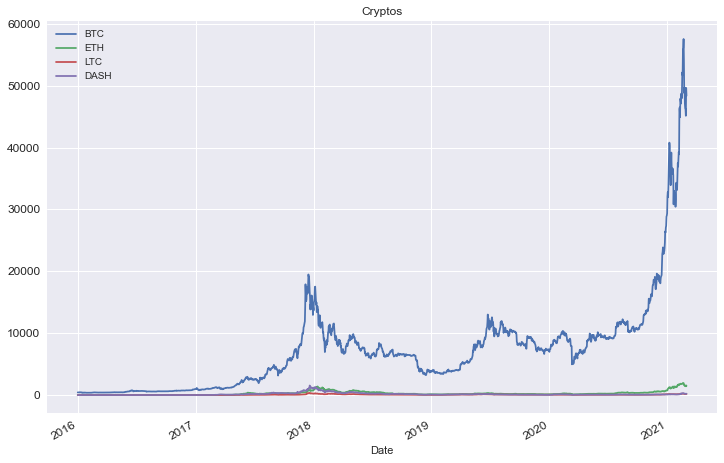

In [5]:
data.plot(figsize = (12, 8), title = "Cryptos", fontsize = 12)
plt.show()

In [6]:
data=data.drop(['ETH', 'LTC', 'DASH'], axis=1)
data

,BTC
Date,
2016-01-01,434.334015
2016-01-02,433.437988
2016-01-03,430.010986
2016-01-04,433.091003
2016-01-05,431.959991
...,...
2021-02-26,46339.761719
2021-02-27,46188.453125
2021-02-28,45137.769531


## Defining an RSI Strategy (Part 1)

In [7]:
data

,BTC
Date,
2016-01-01,434.334015
2016-01-02,433.437988
2016-01-03,430.010986
2016-01-04,433.091003
2016-01-05,431.959991
...,...
2021-02-26,46339.761719
2021-02-27,46188.453125
2021-02-28,45137.769531


In [8]:
data.BTC.diff()
#diferença de um dia para o outro (absoluto)

Date
2016-01-01            NaN
2016-01-02      -0.896027
2016-01-03      -3.427002
2016-01-04       3.080017
2016-01-05      -1.131012
                 ...     
2021-02-26    -754.089844
2021-02-27    -151.308594
2021-02-28   -1050.683594
2021-03-01    4493.472656
2021-03-02   -1252.253906
Name: BTC, Length: 1884, dtype: float64

__U:__ <br>
- if __positive__ price change ("up"): __price change__<br>
- if __negative__ price change ("down"): __0__

In [9]:
data["U"] = np.where(data.BTC.diff() > 0, data.BTC.diff(), 0)

__D:__ <br>
- if __positive__ price change ("up"): __0__<br>
- if __negative__ price change ("down"): __-price change__

In [10]:
data["D"] = np.where(data.BTC.diff() < 0, -data.BTC.diff(), 0)

In [11]:
data

,BTC,U,D
Date,,,
2016-01-01,434.334015,0.000000,0.000000
2016-01-02,433.437988,0.000000,0.896027
2016-01-03,430.010986,0.000000,3.427002
2016-01-04,433.091003,3.080017,0.000000
2016-01-05,431.959991,0.000000,1.131012
...,...,...,...
2021-02-26,46339.761719,0.000000,754.089844
2021-02-27,46188.453125,0.000000,151.308594
2021-02-28,45137.769531,0.000000,1050.683594


__Calculate Moving Averages for U and D__ (alternative: exponential smoothing)

In [12]:
periods = 20

In [13]:
data["MA_U"] = data.U.rolling(periods).mean()

In [14]:
data["MA_D"] = data.D.rolling(periods).mean()

In [15]:
data
#RSI é compostos pela parte de momento UP e DOWN
# em seguida, calcula uma formula entre os momentos e multiplica por 100 (fica entre 0 e 100)

,BTC,U,D,MA_U,MA_D
Date,,,,,
2016-01-01,434.334015,0.000000,0.000000,NaN,NaN
2016-01-02,433.437988,0.000000,0.896027,NaN,NaN
2016-01-03,430.010986,0.000000,3.427002,NaN,NaN
2016-01-04,433.091003,3.080017,0.000000,NaN,NaN
2016-01-05,431.959991,0.000000,1.131012,NaN,NaN
...,...,...,...,...,...
2021-02-26,46339.761719,0.000000,754.089844,1156.279492,802.591992
2021-02-27,46188.453125,0.000000,151.308594,1156.279492,792.028906
2021-02-28,45137.769531,0.000000,1050.683594,791.628320,844.563086


__Calculate Relative Strength Index (RSI)__

Ratio of ups to downs

In [16]:
data["RSI"] = data.MA_U / (data.MA_U + data.MA_D) * 100

In [17]:
data.dropna(inplace = True)

In [18]:
data

,BTC,U,D,MA_U,MA_D,RSI
Date,,,,,,
2016-01-20,420.230011,40.081024,0.000000,5.049753,5.754953,46.736606
2016-01-21,410.261993,0.000000,9.968018,5.049753,6.253354,44.675795
2016-01-22,382.492004,0.000000,27.769989,5.049753,7.597052,39.929080
2016-01-23,387.490997,4.998993,0.000000,5.299702,7.425702,41.646633
2016-01-24,402.971008,15.480011,0.000000,5.919702,7.425702,44.357609
...,...,...,...,...,...,...
2021-02-26,46339.761719,0.000000,754.089844,1156.279492,802.591992,59.027838
2021-02-27,46188.453125,0.000000,151.308594,1156.279492,792.028906,59.347868
2021-02-28,45137.769531,0.000000,1050.683594,791.628320,844.563086,48.382379


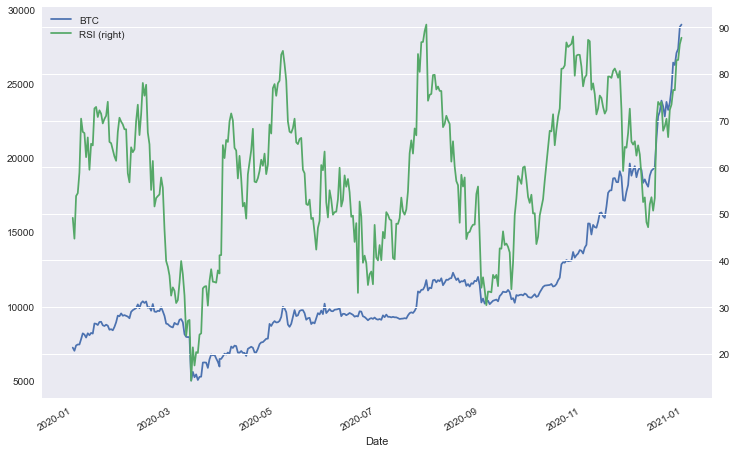

In [21]:
data.loc["2020", ["BTC", "RSI"]].plot(figsize = (12, 8), secondary_y = "RSI")
plt.show()

Instruments which have had
- __more or stronger positive changes__ have a __higher RSI__
- __more or stronger negative changes__ have a __lower RSI__

## Defining an RSI Strategy (Part 2)

- Extreme __high RSI__ (>70) indicates __overbought__ instrument -> __sell__
- Extreme __low RSI__ (<30) indicates __oversold__ instrument -> __buy__ 

In [22]:
rsi_upper = 70
rsi_lower = 30

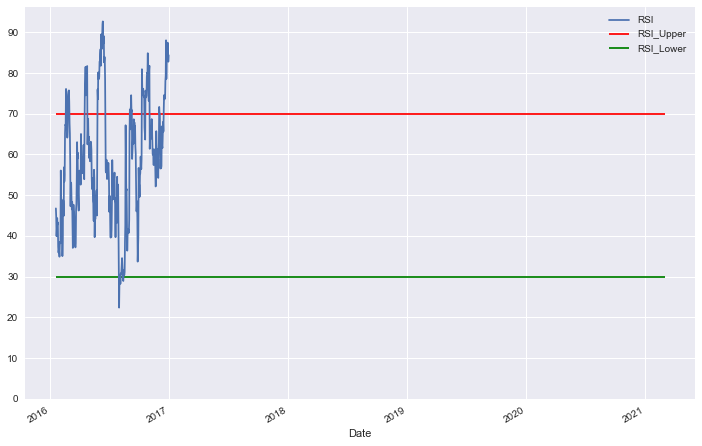

In [25]:
data.loc["2016", ["RSI"]].plot(figsize = (12, 8))
plt.hlines(y = rsi_upper, xmin = data.index[0], xmax = data.index[-1], label = "RSI_Upper", color = "r")
plt.hlines(y = rsi_lower, xmin = data.index[0], xmax = data.index[-1], label = "RSI_Lower", color = "g")
plt.yticks(ticks = range(0, 100, 10))
plt.legend()
plt.show()

In [26]:
data["position"] = np.where(data.RSI > rsi_upper, -1, np.nan) # 1. overbought -> go short

In [27]:
data["position"] = np.where(data.RSI < rsi_lower, 1, data.position) # 2. oversold -> go long

In [28]:
data.position = data.position.fillna(0) # 3. where 1 & 2 isn´t applicable -> neutral

In [29]:
data

,BTC,U,D,MA_U,MA_D,RSI,position
Date,,,,,,,
2016-01-20,420.230011,40.081024,0.000000,5.049753,5.754953,46.736606,0.0
2016-01-21,410.261993,0.000000,9.968018,5.049753,6.253354,44.675795,0.0
2016-01-22,382.492004,0.000000,27.769989,5.049753,7.597052,39.929080,0.0
2016-01-23,387.490997,4.998993,0.000000,5.299702,7.425702,41.646633,0.0
2016-01-24,402.971008,15.480011,0.000000,5.919702,7.425702,44.357609,0.0
...,...,...,...,...,...,...,...
2021-02-26,46339.761719,0.000000,754.089844,1156.279492,802.591992,59.027838,0.0
2021-02-27,46188.453125,0.000000,151.308594,1156.279492,792.028906,59.347868,0.0
2021-02-28,45137.769531,0.000000,1050.683594,791.628320,844.563086,48.382379,0.0


In [30]:
data.position.value_counts()

 0.0    1336
-1.0     411
 1.0     118
Name: position, dtype: int64

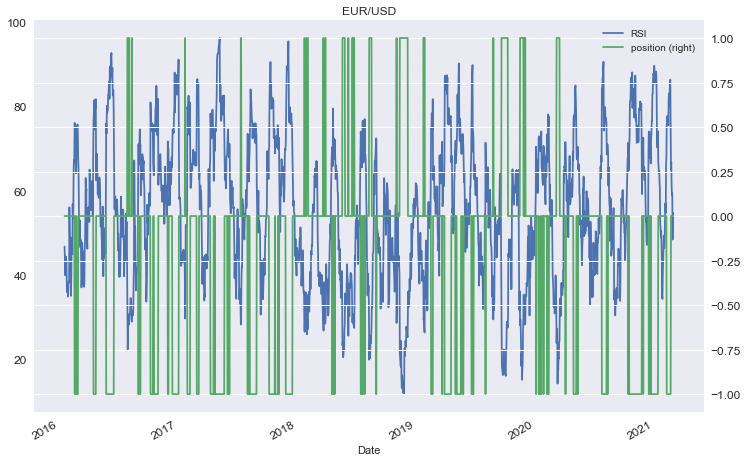

In [31]:
data.loc[:, ["RSI", "position"]].plot(figsize = (12, 8), fontsize = 12, 
                                                      secondary_y = "position", title = "RSI")
plt.show()

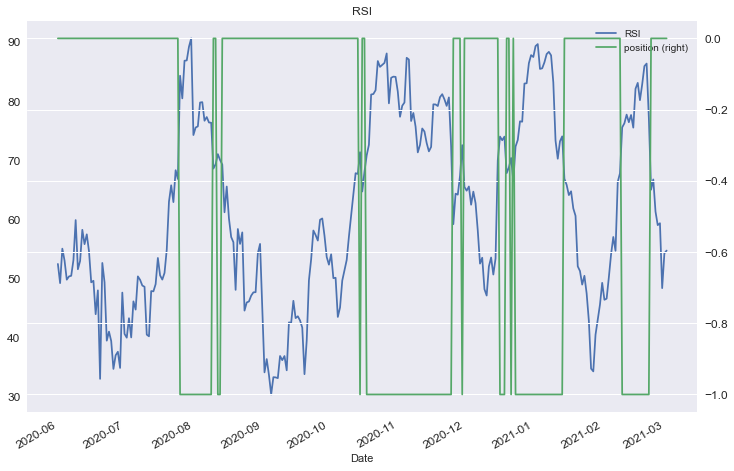

In [33]:
data.loc["06-2020":"03-2021", ["RSI", "position"]].plot(figsize = (12, 8), fontsize = 12, 
                                                      secondary_y = "position", title = "RSI")
plt.show()

## Vectorized Strategy Backtesting

In [34]:
data

,BTC,U,D,MA_U,MA_D,RSI,position
Date,,,,,,,
2016-01-20,420.230011,40.081024,0.000000,5.049753,5.754953,46.736606,0.0
2016-01-21,410.261993,0.000000,9.968018,5.049753,6.253354,44.675795,0.0
2016-01-22,382.492004,0.000000,27.769989,5.049753,7.597052,39.929080,0.0
2016-01-23,387.490997,4.998993,0.000000,5.299702,7.425702,41.646633,0.0
2016-01-24,402.971008,15.480011,0.000000,5.919702,7.425702,44.357609,0.0
...,...,...,...,...,...,...,...
2021-02-26,46339.761719,0.000000,754.089844,1156.279492,802.591992,59.027838,0.0
2021-02-27,46188.453125,0.000000,151.308594,1156.279492,792.028906,59.347868,0.0
2021-02-28,45137.769531,0.000000,1050.683594,791.628320,844.563086,48.382379,0.0


In [35]:
data["returns"] = np.log(data.BTC.div(data.BTC.shift(1)))

In [36]:
data.dropna(inplace = True)

In [37]:
data

,BTC,U,D,MA_U,MA_D,RSI,position,returns
Date,,,,,,,,
2016-01-21,410.261993,0.000000,9.968018,5.049753,6.253354,44.675795,0.0,-0.024006
2016-01-22,382.492004,0.000000,27.769989,5.049753,7.597052,39.929080,0.0,-0.070088
2016-01-23,387.490997,4.998993,0.000000,5.299702,7.425702,41.646633,0.0,0.012985
2016-01-24,402.971008,15.480011,0.000000,5.919702,7.425702,44.357609,0.0,0.039172
2016-01-25,391.726013,0.000000,11.244995,5.919702,7.931401,42.738127,0.0,-0.028302
...,...,...,...,...,...,...,...,...
2021-02-26,46339.761719,0.000000,754.089844,1156.279492,802.591992,59.027838,0.0,-0.016142
2021-02-27,46188.453125,0.000000,151.308594,1156.279492,792.028906,59.347868,0.0,-0.003271
2021-02-28,45137.769531,0.000000,1050.683594,791.628320,844.563086,48.382379,0.0,-0.023010


In [38]:
data["strategy"] = data.position.shift(1) * data["returns"]

In [39]:
data

,BTC,U,D,MA_U,MA_D,RSI,position,returns,strategy
Date,,,,,,,,,
2016-01-21,410.261993,0.000000,9.968018,5.049753,6.253354,44.675795,0.0,-0.024006,NaN
2016-01-22,382.492004,0.000000,27.769989,5.049753,7.597052,39.929080,0.0,-0.070088,-0.0
2016-01-23,387.490997,4.998993,0.000000,5.299702,7.425702,41.646633,0.0,0.012985,0.0
2016-01-24,402.971008,15.480011,0.000000,5.919702,7.425702,44.357609,0.0,0.039172,0.0
2016-01-25,391.726013,0.000000,11.244995,5.919702,7.931401,42.738127,0.0,-0.028302,-0.0
...,...,...,...,...,...,...,...,...,...
2021-02-26,46339.761719,0.000000,754.089844,1156.279492,802.591992,59.027838,0.0,-0.016142,-0.0
2021-02-27,46188.453125,0.000000,151.308594,1156.279492,792.028906,59.347868,0.0,-0.003271,-0.0
2021-02-28,45137.769531,0.000000,1050.683594,791.628320,844.563086,48.382379,0.0,-0.023010,-0.0


In [40]:
data.dropna(inplace = True)

In [41]:
ptc = 0.00007

In [42]:
data["trades"] = data.position.diff().fillna(0).abs()

In [43]:
data.trades.value_counts()

0.0    1697
1.0     166
Name: trades, dtype: int64

In [44]:
data["strategy_net"] = data.strategy - data.trades * ptc

In [45]:
data["creturns"] = data["returns"].cumsum().apply(np.exp)
data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)
data["cstrategy_net"] = data["strategy_net"].cumsum().apply(np.exp)

In [46]:
data

,BTC,U,D,MA_U,MA_D,RSI,position,returns,strategy,trades,strategy_net,creturns,cstrategy,cstrategy_net
Date,,,,,,,,,,,,,,
2016-01-22,382.492004,0.000000,27.769989,5.049753,7.597052,39.929080,0.0,-0.070088,-0.0,0.0,-0.0,0.932312,1.000000,1.000000
2016-01-23,387.490997,4.998993,0.000000,5.299702,7.425702,41.646633,0.0,0.012985,0.0,0.0,0.0,0.944496,1.000000,1.000000
2016-01-24,402.971008,15.480011,0.000000,5.919702,7.425702,44.357609,0.0,0.039172,0.0,0.0,0.0,0.982228,1.000000,1.000000
2016-01-25,391.726013,0.000000,11.244995,5.919702,7.931401,42.738127,0.0,-0.028302,-0.0,0.0,-0.0,0.954819,1.000000,1.000000
2016-01-26,392.153015,0.427002,0.000000,5.941052,7.788652,43.271524,0.0,0.001089,0.0,0.0,0.0,0.955860,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-26,46339.761719,0.000000,754.089844,1156.279492,802.591992,59.027838,0.0,-0.016142,-0.0,0.0,-0.0,112.951632,0.021861,0.021608
2021-02-27,46188.453125,0.000000,151.308594,1156.279492,792.028906,59.347868,0.0,-0.003271,-0.0,0.0,-0.0,112.582822,0.021861,0.021608
2021-02-28,45137.769531,0.000000,1050.683594,791.628320,844.563086,48.382379,0.0,-0.023010,-0.0,0.0,-0.0,110.021816,0.021861,0.021608


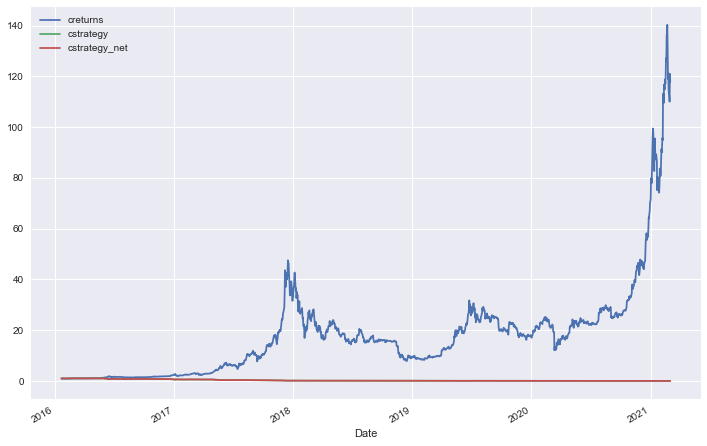

In [47]:
data[["creturns", "cstrategy", "cstrategy_net"]].plot(figsize = (12 , 8))
plt.show()

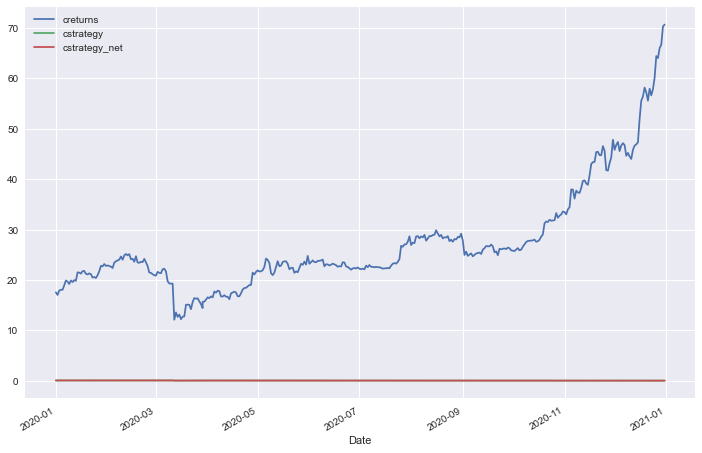

In [48]:
data.loc["2020", ["creturns", "cstrategy", "cstrategy_net"]].plot(figsize = (12 , 8))
plt.show()

In [ ]:
#imprestável nas condições apresentadas

## Using the RSIBacktester Class

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brute
plt.style.use("seaborn")

In [52]:
pd.read_csv("cryptos.csv")

,Date,BTC,ETH,LTC,DASH
0,2016-01-01,434.334015,0.948024,3.508980,3.377020
1,2016-01-02,433.437988,0.937124,3.502160,3.280160
2,2016-01-03,430.010986,0.971905,3.483070,3.240140
3,2016-01-04,433.091003,0.954480,3.495390,3.318990
4,2016-01-05,431.959991,0.950176,3.469670,3.325760
...,...,...,...,...,...
1879,2021-02-26,46339.761719,1446.033691,170.398148,206.701660
1880,2021-02-27,46188.453125,1459.973145,172.100449,211.656204
1881,2021-02-28,45137.769531,1416.048950,164.927170,196.271896
1882,2021-03-01,49631.242188,1564.707642,175.237900,223.279999


In [55]:
class RSIBacktester(): 
    ''' Class for the vectorized backtesting of RSI-based trading strategies.

    Attributes
    ==========
    symbol: str
        ticker symbol with which to work with
    periods: int
        time window in days to calculate moving average UP & DOWN 
    rsi_upper: int
        upper rsi band indicating overbought instrument
    rsi_lower: int
        lower rsi band indicating oversold instrument
    start: str
        start date for data retrieval
    end: str
        end date for data retrieval
    tc: float
        proportional transaction costs per trade
        
        
    Methods
    =======
    get_data:
        retrieves and prepares the data
        
    set_parameters:
        sets new RSI parameter(s)
        
    test_strategy:
        runs the backtest for the RSI-based strategy
        
    plot_results:
        plots the performance of the strategy compared to buy and hold
        
    update_and_run:
        updates RSI parameters and returns the negative absolute performance (for minimization algorithm)
        
    optimize_parameters:
        implements a brute force optimization for the three RSI parameters
    '''
    
    def __init__(self, symbol, periods, rsi_upper, rsi_lower, start, end, tc):
        self.symbol = symbol
        self.periods = periods
        self.rsi_upper = rsi_upper
        self.rsi_lower = rsi_lower
        self.start = start
        self.end = end
        self.tc = tc
        self.results = None 
        self.get_data()
        
    def __repr__(self):
        return "RSIBacktester(symbol = {}, RSI({}, {}, {}), start = {}, end = {})".format(self.symbol, self.periods, self.rsi_upper, self.rsi_lower, self.start, self.end)
        
    def get_data(self):
        ''' Retrieves and prepares the data.
        '''
        raw = pd.read_csv("cryptos.csv", parse_dates = ["Date"], index_col = "Date")
        raw = raw[self.symbol].to_frame().dropna()
        raw = raw.loc[self.start:self.end]
        raw.rename(columns={self.symbol: "price"}, inplace=True)
        raw["returns"] = np.log(raw / raw.shift(1))
        raw["U"] = np.where(raw.price.diff() > 0, raw.price.diff(), 0) 
        raw["D"] = np.where(raw.price.diff() < 0, -raw.price.diff(), 0)
        raw["MA_U"] = raw.U.rolling(self.periods).mean()
        raw["MA_D"] = raw.D.rolling(self.periods).mean()
        raw["RSI"] = raw.MA_U / (raw.MA_U + raw.MA_D) * 100
        self.data = raw 
        
    def set_parameters(self, periods = None, rsi_upper = None, rsi_lower = None):
        ''' Updates RSI parameters and resp. time series.
        '''
        if periods is not None:
            self.periods = periods     
            self.data["MA_U"] = self.data.U.rolling(self.periods).mean()
            self.data["MA_D"] = self.data.D.rolling(self.periods).mean()
            self.data["RSI"] = self.data.MA_U / (self.data.MA_U + self.data.MA_D) * 100
            
        if rsi_upper is not None:
            self.rsi_upper = rsi_upper
            
        if rsi_lower is not None:
            self.rsi_lower = rsi_lower
            
    def test_strategy(self):
        ''' Backtests the trading strategy.
        '''
        data = self.data.copy().dropna()
        data["position"] = np.where(data.RSI > self.rsi_upper, -1, np.nan)
        data["position"] = np.where(data.RSI < self.rsi_lower, 1, data.position)
        data.position = data.position.fillna(0)
        data["strategy"] = data["position"].shift(1) * data["returns"]
        data.dropna(inplace=True)
        
        # determine when a trade takes place
        data["trades"] = data.position.diff().fillna(0).abs()
        trades=data.trades.value_counts()
        
        # subtract transaction costs from return when trade takes place
        data.strategy = data.strategy - data.trades * self.tc
        
        data["creturns"] = data["returns"].cumsum().apply(np.exp)
        data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)
        self.results = data
        
        perf = data["cstrategy"].iloc[-1] # absolute performance of the strategy
        outperf = perf - data["creturns"].iloc[-1] # out-/underperformance of strategy
        return round(perf, 6), round(outperf, 6), trades
    
    def plot_results(self):
        ''' Plots the cumulative performance of the trading strategy
        compared to buy and hold.
        '''
        if self.results is None:
            print("No results to plot yet. Run a strategy.")
        else:
            title = "{} | RSI ({}, {}, {}) | TC = {}".format(self.symbol, self.periods, self.rsi_upper, self.rsi_lower, self.tc)
            self.results[["creturns", "cstrategy"]].plot(title=title, figsize=(12, 8))
        
    def update_and_run(self, RSI):
        ''' Updates RSI parameters and returns the negative absolute performance (for minimization algorithm).

        Parameters
        ==========
        RSI: tuple
            RSI parameter tuple
        '''
        self.set_parameters(int(RSI[0]), int(RSI[1]), int(RSI[2]))
        return -self.test_strategy()[0]
    
    def optimize_parameters(self, periods_range, rsi_upper_range, rsi_lower_range):
        ''' Finds global maximum given the RSI parameter ranges.

        Parameters
        ==========
        periods_range, rsi_upper_range, rsi_lower_range : tuple
            tuples of the form (start, end, step size)
        '''
        opt = brute(self.update_and_run, (periods_range, rsi_upper_range, rsi_lower_range), finish=None)
        return opt, -self.update_and_run(opt)

In [58]:
tester = RSIBacktester("BTC", periods = 20, rsi_upper = 70, rsi_lower = 30,
              start = "2016-01-01", end = "2021-03-07", tc = 0)

In [59]:
tester

RSIBacktester(symbol = BTC, RSI(20, 70, 30), start = 2016-01-01, end = 2021-03-07)

In [60]:
tester.data

,price,returns,U,D,MA_U,MA_D,RSI
Date,,,,,,,
2016-01-01,434.334015,NaN,0.000000,0.000000,NaN,NaN,NaN
2016-01-02,433.437988,-0.002065,0.000000,0.896027,NaN,NaN,NaN
2016-01-03,430.010986,-0.007938,0.000000,3.427002,NaN,NaN,NaN
2016-01-04,433.091003,0.007137,3.080017,0.000000,NaN,NaN,NaN
2016-01-05,431.959991,-0.002615,0.000000,1.131012,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2021-02-26,46339.761719,-0.016142,0.000000,754.089844,1156.279492,802.591992,59.027838
2021-02-27,46188.453125,-0.003271,0.000000,151.308594,1156.279492,792.028906,59.347868
2021-02-28,45137.769531,-0.023010,0.000000,1050.683594,791.628320,844.563086,48.382379


In [61]:
tester.test_strategy()

(0.021861,
 -115.103159,
 0.0    1698
 1.0     166
 Name: trades, dtype: int64)

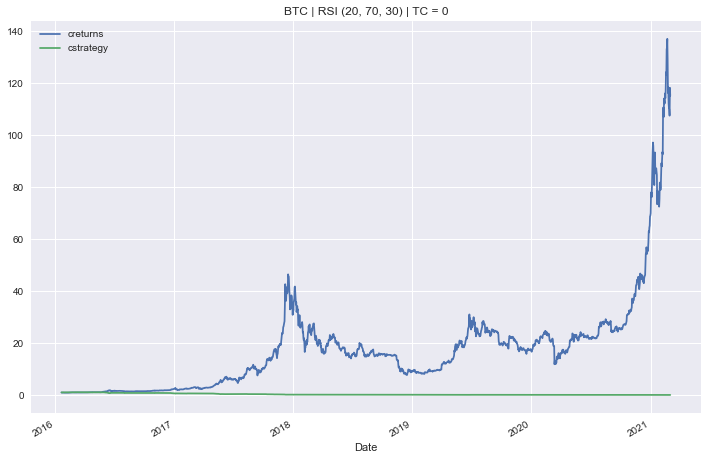

In [62]:
tester.plot_results()

In [63]:
tester.results

,price,returns,U,D,MA_U,MA_D,RSI,position,strategy,trades,creturns,cstrategy
Date,,,,,,,,,,,,
2016-01-21,410.261993,-0.024006,0.000000,9.968018,5.049753,6.253354,44.675795,0.0,-0.0,0.0,0.976280,1.000000
2016-01-22,382.492004,-0.070088,0.000000,27.769989,5.049753,7.597052,39.929080,0.0,-0.0,0.0,0.910197,1.000000
2016-01-23,387.490997,0.012985,4.998993,0.000000,5.299702,7.425702,41.646633,0.0,0.0,0.0,0.922093,1.000000
2016-01-24,402.971008,0.039172,15.480011,0.000000,5.919702,7.425702,44.357609,0.0,0.0,0.0,0.958930,1.000000
2016-01-25,391.726013,-0.028302,0.000000,11.244995,5.919702,7.931401,42.738127,0.0,-0.0,0.0,0.932170,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-26,46339.761719,-0.016142,0.000000,754.089844,1156.279492,802.591992,59.027838,0.0,-0.0,0.0,110.272376,0.021861
2021-02-27,46188.453125,-0.003271,0.000000,151.308594,1156.279492,792.028906,59.347868,0.0,-0.0,0.0,109.912314,0.021861
2021-02-28,45137.769531,-0.023010,0.000000,1050.683594,791.628320,844.563086,48.382379,0.0,-0.0,0.0,107.412056,0.021861


In [64]:
# otimizar período, banda acima, banda abaixo
tester.optimize_parameters((5, 20, 1), (65, 80, 1), (20, 35, 1)) # higher volatility

(array([18., 79., 24.]), 0.378729)

In [68]:
tester.test_strategy()

(1.678033,
 -112.862882,
 0.0    1817
 1.0      18
 Name: trades, dtype: int64)

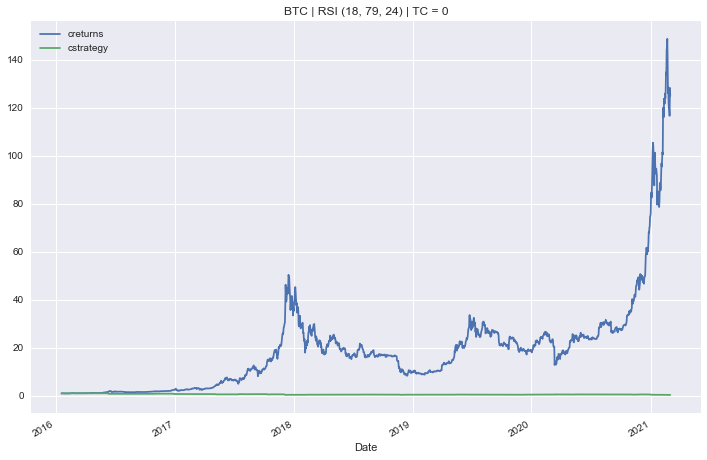

In [65]:
tester.plot_results()

In [66]:
tester.optimize_parameters((20, 50, 1), (75, 85, 1), (15, 25, 1)) # lower volatility

(array([49., 81., 22.]), 1.678033)

In [69]:
tester.test_strategy()

(1.678033,
 -112.862882,
 0.0    1817
 1.0      18
 Name: trades, dtype: int64)

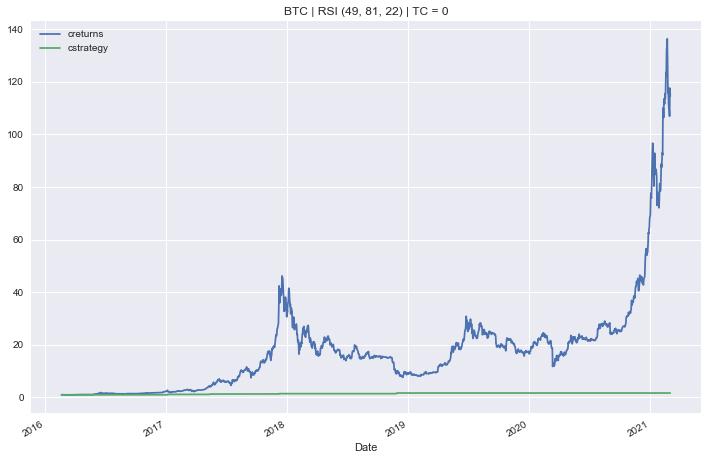

In [67]:
tester.plot_results()

__ETH__

In [76]:
tester = RSIBacktester("ETH", periods = 20, rsi_upper = 70, rsi_lower = 30,
              start = "2016-01-01", end = "2021-03-07", tc = 0)

In [77]:
tester.test_strategy()

(0.004699,
 -974.397454,
 0.0    1675
 1.0     189
 Name: trades, dtype: int64)

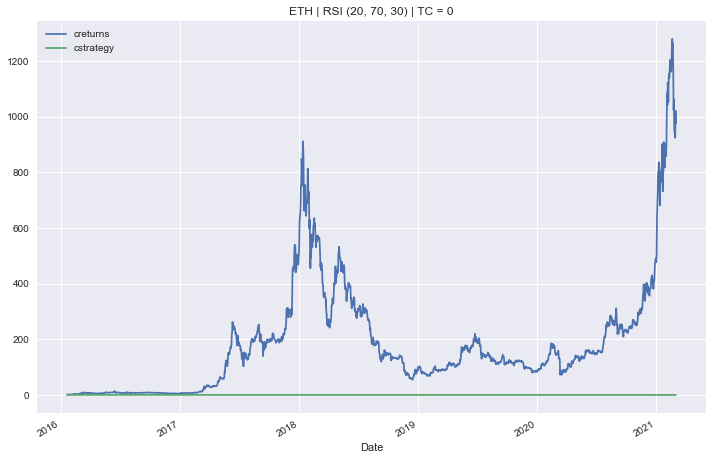

In [78]:
tester.plot_results()

In [82]:
tester.optimize_parameters((5, 30, 1), (90, 99, 1), (1, 10, 1)) # high volatility mesmo assim não dá...

(array([ 8., 98.,  8.]), 2.805676)

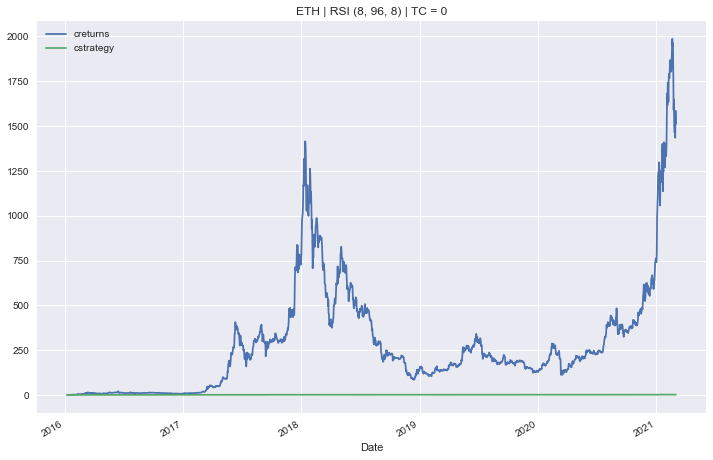

In [80]:
tester.plot_results()

In [83]:
tester.test_strategy()

(2.805676,
 -1509.785955,
 0.0    1812
 1.0      64
 Name: trades, dtype: int64)

## Alternative Strategies and Interpretations

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brute
plt.style.use("seaborn")

In [86]:
tester = RSIBacktester("BTC", periods = 20, rsi_upper = 70, rsi_lower = 30,
              start = "2016-01-01", end = "2021-03-07", tc = 0)

In [87]:
alt = tester.data.dropna()
alt

,price,returns,U,D,MA_U,MA_D,RSI
Date,,,,,,,
2016-01-20,420.230011,0.100239,40.081024,0.000000,5.049753,5.754953,46.736606
2016-01-21,410.261993,-0.024006,0.000000,9.968018,5.049753,6.253354,44.675795
2016-01-22,382.492004,-0.070088,0.000000,27.769989,5.049753,7.597052,39.929080
2016-01-23,387.490997,0.012985,4.998993,0.000000,5.299702,7.425702,41.646633
2016-01-24,402.971008,0.039172,15.480011,0.000000,5.919702,7.425702,44.357609
...,...,...,...,...,...,...,...
2021-02-26,46339.761719,-0.016142,0.000000,754.089844,1156.279492,802.591992,59.027838
2021-02-27,46188.453125,-0.003271,0.000000,151.308594,1156.279492,792.028906,59.347868
2021-02-28,45137.769531,-0.023010,0.000000,1050.683594,791.628320,844.563086,48.382379


Convergence: 
- if __Price__ reaches __higher highs__ -> __RSI__ reaches __higher highs__ (confirmation)
- if __Price__ reaches __lower lows__ -> __RSI__ reaches __lower lows__ (confirmation)

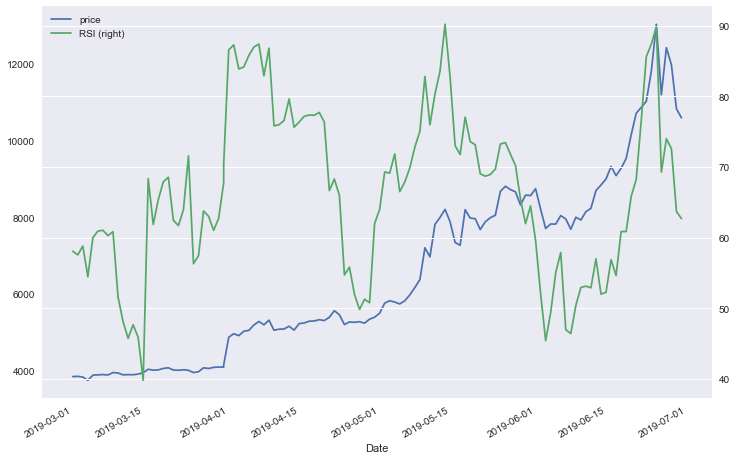

In [89]:
alt.loc["03-2019":"06-2019", ["price", "RSI"]].plot(figsize = (12, 8), secondary_y = "RSI")
plt.show()

Divergence: 
- if __Price__ reaches __higher highs__ -> __RSI fails__ to reach higher highs (__Bearish Divergence__)
- if __Price__ reaches __lower lows__ -> __RSI fails__ to reach lower lows (__Bullish Divergence__)

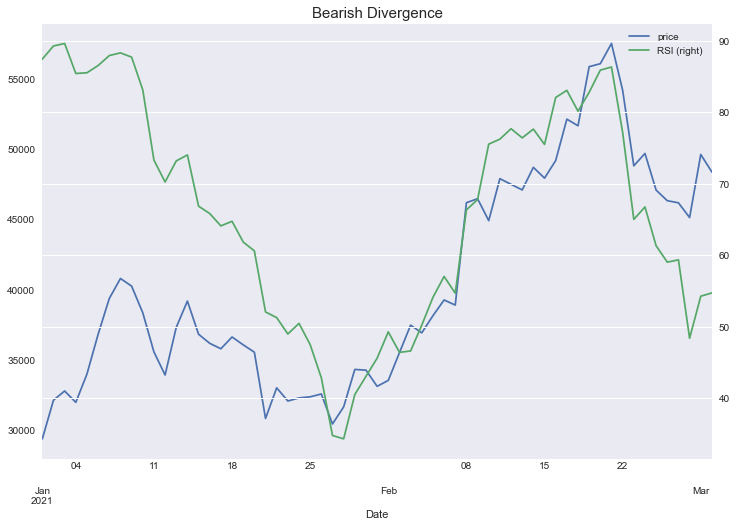

In [90]:
alt.loc["01-2021":"03-2021", ["price", "RSI"]].plot(figsize = (12, 8), secondary_y = "RSI")
plt.title("Bearish Divergence", fontsize = 15)
plt.show()

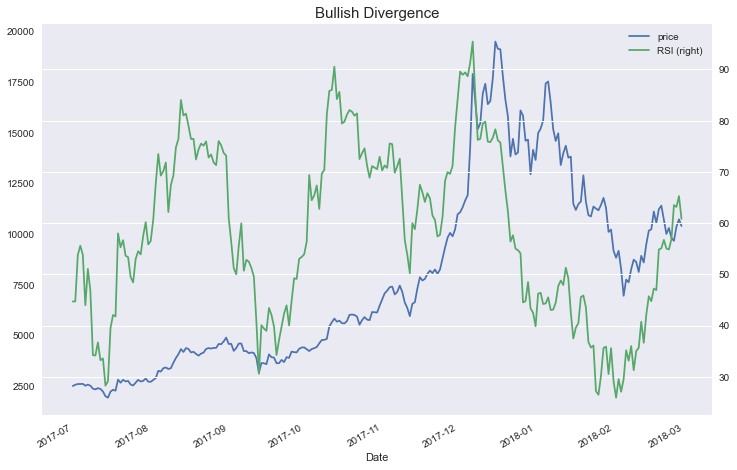

In [91]:
alt.loc["07-2017":"02-2018", ["price", "RSI"]].plot(figsize = (12, 8), secondary_y = "RSI")
plt.title("Bullish Divergence", fontsize = 15)
plt.show()